In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
train.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.33,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
1,0,335.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.82,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
2,0,336.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,6.52,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
3,0,336.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,7.23,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
4,0,337.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,9.50,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00


In [6]:
train.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00
mean,4.08,6998.18,-7791.05,-8605.14,-958.27,-6982.04,-7000.76,-7205.37,-43.03,-7007.12,-7221.97,-949.84,-804.02,-989.37,-8515.78,-8515.69,-8585.16
std,2.46,3797.94,4168.06,3491.48,2969.16,4592.48,4582.29,4486.57,990.10,4578.76,4480.14,2944.07,4177.16,3028.43,3554.02,3554.22,3484.04
min,0.00,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
25%,2.00,3757.87,-9999.00,-9999.00,8.50,-9999.00,-9999.00,-9999.00,23.33,-9999.00,-9999.00,0.65,0.67,15.20,-9999.00,-9999.00,-9999.00
50%,4.00,6905.18,-9999.00,-9999.00,17.50,-9999.00,-9999.00,-9999.00,55.51,-9999.00,-9999.00,1.10,1.15,24.97,-9999.00,-9999.00,-9999.00
75%,6.00,10052.49,-9999.00,-9999.00,26.00,8.56,2.25,0.03,78.98,0.09,0.06,2.02,2.15,30.63,-9999.00,-9999.00,-9999.00
max,8.00,15651.58,181.81,388.84,36.00,20.33,3.09,0.33,1124.44,1.46,13.84,80266.80,97543.40,208.63,0.40,1.00,3.65


In [7]:
train.WELLNUM.value_counts() * 100/len(train)

6   14.38
7   13.73
4   12.22
5   11.22
2   10.93
1   10.77
3   10.25
0    9.33
8    7.17
Name: WELLNUM, dtype: float64

In [8]:
train.replace(['-9999', -9999], np.nan, inplace=True)
train.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,nan,nan,nan,nan,nan,nan,5.33,nan,nan,nan,nan,nan,nan,nan,nan
1,0,335.66,nan,nan,nan,nan,nan,nan,5.82,nan,nan,nan,nan,nan,nan,nan,nan
2,0,336.16,nan,nan,nan,nan,nan,nan,6.52,nan,nan,nan,nan,nan,nan,nan,nan
3,0,336.66,nan,nan,nan,nan,nan,nan,7.23,nan,nan,nan,nan,nan,nan,nan,nan
4,0,337.16,nan,nan,nan,nan,nan,nan,9.50,nan,nan,nan,nan,nan,nan,nan,nan


In [9]:
train.WELLNUM.value_counts()

6    45874
7    43786
4    38971
5    35790
2    34871
1    34361
3    32691
0    29754
8    22869
Name: WELLNUM, dtype: int64

In [10]:
def log_plot(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    f, ax = plt.subplots(nrows=1, ncols=17, figsize=(15, 10))
    ax[0].plot(logs.GR, logs.DEPTH, color='green')
    ax[1].plot(logs.DTC, logs.DEPTH, color='red')
    ax[2].plot(logs.DTS, logs.DEPTH, color='black')
    ax[3].plot(logs.BS, logs.DEPTH, color='darkorange')
    ax[4].plot(logs.CALI, logs.DEPTH, color='tan')
    ax[5].plot(logs.DEN, logs.DEPTH, color='navy')
    ax[6].plot(logs.DENC, logs.DEPTH, color='blueviolet')
    ax[7].plot(logs.NEU, logs.DEPTH, color='chocolate')
    ax[8].plot(logs.PEF, logs.DEPTH, color='cyan')
    ax[9].plot(logs.RDEP, logs.DEPTH, color='crimson')
    ax[10].plot(logs.RMED, logs.DEPTH, color='magenta')
    ax[11].plot(logs.ROP, logs.DEPTH, color='olive')
    ax[12].plot(logs.PHIF, logs.DEPTH, color='teal')
    ax[13].plot(logs.SW, logs.DEPTH, color='gray')
    ax[14].plot(logs.VSH, logs.DEPTH, color='deepskyblue')
  
    
    
    
    
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 0,color = 'blue')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 1,color = 'red')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 2,color = 'green')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 3,color = 'purple')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 4,color = 'brown')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 5,color = 'gray')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 6,color = 'yellow')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 7,color = 'navy')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 8,color = 'orange')

                

    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR", fontsize = 10)
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)",fontsize = 16)
    ax[1].set_xlabel("DTC", fontsize = 10)
    ax[1].set_xlim(logs.DTC.min(),logs.DTC.max())
    ax[2].set_xlabel("DTS", fontsize = 10)
    ax[2].set_xlim(logs.DTS.min(),logs.DTS.max())
    ax[3].set_xlabel("BS", fontsize = 10)
    ax[3].set_xlim(logs.BS.min(),logs.DEN.max())
    ax[4].set_xlabel("CALI", fontsize = 10)
    ax[4].set_xlim(logs.CALI.min(),logs.DEN.max())
    ax[5].set_xlabel("DEN", fontsize = 10)
    ax[5].set_xlim(logs.DEN.min(),logs.DEN.max())
    ax[6].set_xlabel("DENC", fontsize = 10)
    ax[6].set_xlim(logs.DENC.min(),logs.DEN.max())
    ax[7].set_xlabel("NEU", fontsize = 10)
    ax[7].set_xlim(logs.NEU.min(),logs.DEN.max())
    ax[8].set_xlabel("PEF", fontsize = 10)
    ax[8].set_xlim(logs.PEF.min(),logs.DEN.max())
    ax[9].set_xlabel("RDEP", fontsize = 10)
    ax[9].set_xlim(logs.RDEP.min(),logs.DEN.max())
    ax[10].set_xlabel("RMED", fontsize = 10)
    ax[10].set_xlim(logs.RMED.min(),logs.DEN.max())
    ax[11].set_xlabel("ROP", fontsize = 10)
    ax[11].set_xlim(logs.ROP.min(),logs.DEN.max())
    ax[12].set_xlabel("PHIF", fontsize = 10)
    ax[12].set_xlim(logs.PHIF.min(),logs.DEN.max())
    ax[13].set_xlabel("SW", fontsize = 10)
    ax[13].set_xlim(logs.SW.min(),logs.DEN.max())
    ax[14].set_xlabel("VSH", fontsize = 10)
    ax[14].set_xlim(logs.VSH.min(),logs.DEN.max())
    
    ax[15].set_xlabel("WELLNUM", fontsize = 10)
    
#    ax[15].set_xlim(logs.WELLNUM.min(),logs.WELLNUM.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='0'),
                       Patch(facecolor='red', edgecolor='red',   label='1'),
                       Patch(facecolor='green', edgecolor='green', label='2'),
                       Patch(facecolor='purple', edgecolor='purple', label='3'),
                       Patch(facecolor='brown', edgecolor='brown', label='4'),
                       Patch(facecolor='gray', edgecolor='gray', label='5'),
                       Patch(facecolor='yellow', edgecolor='yellow', label='6'),
                       Patch(facecolor='navy', edgecolor='navy', label='7'),
                       Patch(facecolor='orange', edgecolor='orange', label='8')]
                             
    ax[15].legend(handles=legend_elements, loc='best')
    
    f.suptitle('Well Logs', fontsize=20,y=0.94)

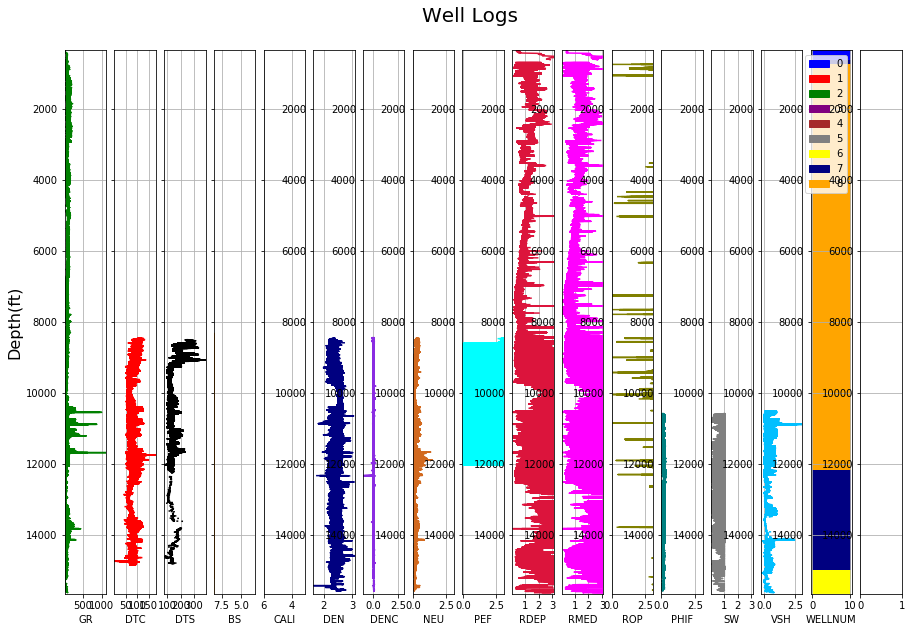

In [11]:
log_plot(train)

In [12]:
train.isna().sum()/len(train)

WELLNUM   0.00
DEPTH     0.00
DTC       0.78
DTS       0.86
BS        0.10
CALI      0.70
DEN       0.70
DENC      0.72
GR        0.01
NEU       0.70
PEF       0.72
RDEP      0.10
RMED      0.09
ROP       0.10
PHIF      0.85
SW        0.85
VSH       0.86
dtype: float64

In [13]:
len(train[train.PHIF.isna() & train.SW.isna() & train.VSH.isna()])/len(train)

0.8429147842880298

In [14]:
train['all_null'] = (train.PHIF.isna() & train.SW.isna() & train.VSH.isna())

In [15]:
train.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH,all_null
0,0,335.16,nan,nan,nan,nan,nan,nan,5.33,nan,nan,nan,nan,nan,nan,nan,nan,True
1,0,335.66,nan,nan,nan,nan,nan,nan,5.82,nan,nan,nan,nan,nan,nan,nan,nan,True
2,0,336.16,nan,nan,nan,nan,nan,nan,6.52,nan,nan,nan,nan,nan,nan,nan,nan,True
3,0,336.66,nan,nan,nan,nan,nan,nan,7.23,nan,nan,nan,nan,nan,nan,nan,nan,True
4,0,337.16,nan,nan,nan,nan,nan,nan,9.50,nan,nan,nan,nan,nan,nan,nan,nan,True


In [16]:
train_clean = train[train.all_null == False].drop('all_null', axis = 1).reset_index(drop = True)

In [17]:
train_clean.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,11709.16,132.24,nan,nan,12.99,2.29,nan,62.74,0.42,nan,1.18,0.78,nan,0.18,1.00,nan
1,0,11709.66,123.92,nan,nan,12.63,2.30,nan,53.84,0.74,nan,0.88,1.08,nan,0.18,1.00,nan
2,0,11710.16,115.06,nan,nan,12.77,2.28,nan,52.85,0.46,nan,0.95,0.92,nan,0.17,1.00,nan
3,0,11710.66,121.88,nan,nan,11.77,2.28,nan,58.23,0.50,nan,0.87,1.24,nan,0.16,1.00,nan
4,0,11711.16,125.35,nan,nan,11.62,2.33,nan,57.34,0.60,nan,0.83,0.96,nan,0.15,1.00,nan


In [18]:
train_clean.isna().sum()/len(train_clean)

WELLNUM   0.00
DEPTH     0.00
DTC       0.48
DTS       0.84
BS        0.14
CALI      0.02
DEN       0.02
DENC      0.16
GR        0.00
NEU       0.02
PEF       0.16
RDEP      0.01
RMED      0.00
ROP       0.14
PHIF      0.06
SW        0.06
VSH       0.10
dtype: float64

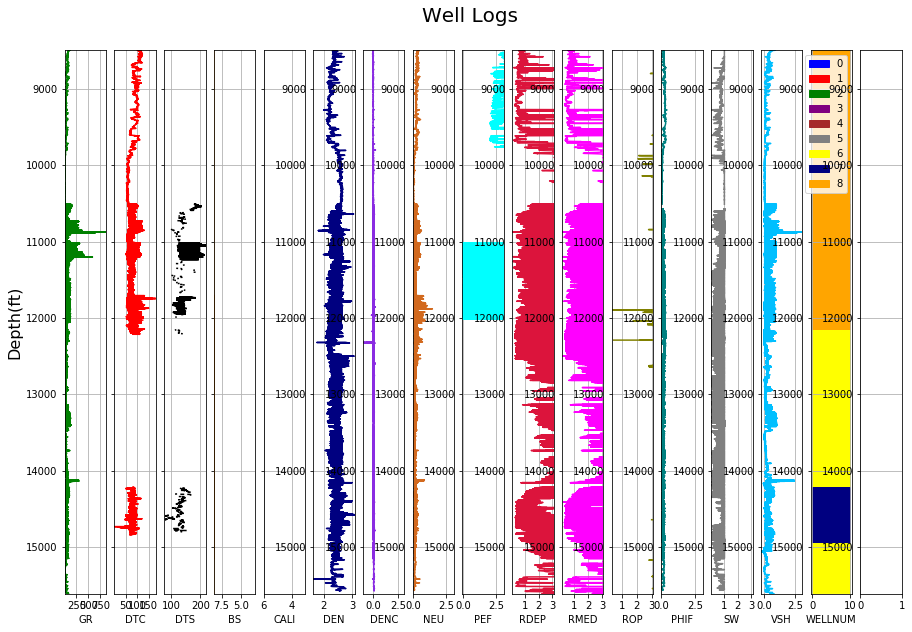

In [19]:
log_plot(train_clean)

df_new = train_clean.copy()
df_new['WELLNUM'] = train_clean['WELLNUM'].astype('str')
sns.pairplot(df_new[['WELLNUM', 'GR', 'DEN', 'NEU', 'RDEP', 'PHIF', 'SW', 'VSH']], hue='WELLNUM');

In [20]:
# GR and NEU seems to be a good predictor for Vsh
# DEN seems to be a good predictor for PHIF

In [21]:
len(train_clean)

50105

In [22]:
train_clean.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,50105.00,50105.00,25885.00,8229.00,43220.00,49058.00,49104.00,42219.00,50105.00,48911.00,42219.00,49772.00,50006.00,43123.00,47314.00,47314.00,45100.00
mean,4.37,12297.65,78.91,137.97,8.50,8.76,2.41,0.05,45.58,0.19,5.14,22.01,873.03,23.38,0.14,0.70,0.31
std,2.62,1551.76,15.53,24.13,0.00,0.52,0.16,0.03,45.77,0.09,1.84,406.24,7189.75,7.82,0.09,0.35,0.25
min,0.00,8494.00,1.03,74.82,8.50,6.00,1.63,-0.98,2.77,-0.00,-0.02,0.07,0.09,0.34,0.00,0.01,-0.25
25%,2.00,11229.00,68.37,124.53,8.50,8.57,2.26,0.03,19.89,0.14,4.55,1.44,1.48,18.84,0.06,0.34,0.12
50%,5.00,12009.84,75.38,133.53,8.50,8.62,2.43,0.05,36.01,0.18,5.42,2.67,3.07,24.95,0.13,0.93,0.25
75%,6.00,13394.36,86.88,141.52,8.50,8.70,2.55,0.06,54.15,0.22,6.13,7.36,8.72,29.91,0.22,1.00,0.39
max,8.00,15614.17,181.81,217.97,8.50,20.33,3.09,0.26,873.77,1.46,13.36,80266.80,62290.80,77.63,0.40,1.00,3.65


values between 13000 and 14500 are missing

df_new = train_clean.copy()
df_new['WELLNUM'] = train_clean['WELLNUM'].astype('str')
sns.pairplot(df_new[['DEPTH','WELLNUM', 'GR', 'DEN', 'NEU', 'RDEP', 'PHIF', 'SW', 'VSH']], hue='WELLNUM');

To remove:

depth
bit size
CAL
well number
*Corrected Density (leave till later)

WORKFLOW
- Remove irrelevant variables (majorly based on domain knowledge)

-Remove missing values

-Remove outliers (with specific outlier removal techniques and good reasons) 

-Check integrity of data after outlier removal (Ensure that there are no missing values and both predicting and target variables are available with values) 

-Check for collinearity and select appropriate predicting variables alongside other good reasons besides collinearity. 

-Please Ensure to have good plots in all steps and appropriate comments where applicable

In [23]:
train_clean.columns

Index(['WELLNUM', 'DEPTH', 'DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC', 'GR',
       'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW', 'VSH'],
      dtype='object')

In [24]:
Train_clean = train_clean.drop(['WELLNUM', 'DEPTH','BS','DENC'], axis = 1)
 # 'BS','DENC' dropped for low variance
print(len(Train_clean))
Train_clean.head()

50105


,DTC,DTS,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,132.24,nan,12.99,2.29,62.74,0.42,nan,1.18,0.78,nan,0.18,1.00,nan
1,123.92,nan,12.63,2.30,53.84,0.74,nan,0.88,1.08,nan,0.18,1.00,nan
2,115.06,nan,12.77,2.28,52.85,0.46,nan,0.95,0.92,nan,0.17,1.00,nan
3,121.88,nan,11.77,2.28,58.23,0.50,nan,0.87,1.24,nan,0.16,1.00,nan
4,125.35,nan,11.62,2.33,57.34,0.60,nan,0.83,0.96,nan,0.15,1.00,nan


In [25]:
Train_clean.describe()

,DTC,DTS,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,25885.00,8229.00,49058.00,49104.00,50105.00,48911.00,42219.00,49772.00,50006.00,43123.00,47314.00,47314.00,45100.00
mean,78.91,137.97,8.76,2.41,45.58,0.19,5.14,22.01,873.03,23.38,0.14,0.70,0.31
std,15.53,24.13,0.52,0.16,45.77,0.09,1.84,406.24,7189.75,7.82,0.09,0.35,0.25
min,1.03,74.82,6.00,1.63,2.77,-0.00,-0.02,0.07,0.09,0.34,0.00,0.01,-0.25
25%,68.37,124.53,8.57,2.26,19.89,0.14,4.55,1.44,1.48,18.84,0.06,0.34,0.12
50%,75.38,133.53,8.62,2.43,36.01,0.18,5.42,2.67,3.07,24.95,0.13,0.93,0.25
75%,86.88,141.52,8.70,2.55,54.15,0.22,6.13,7.36,8.72,29.91,0.22,1.00,0.39
max,181.81,217.97,20.33,3.09,873.77,1.46,13.36,80266.80,62290.80,77.63,0.40,1.00,3.65


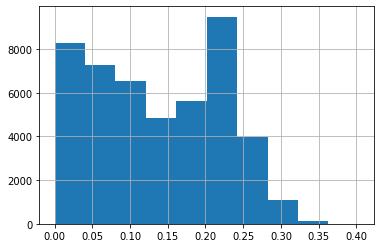

In [26]:
Train_clean.PHIF.hist();

In [27]:
Train_clean.var()

DTC         241.13
DTS         582.36
CALI          0.27
DEN           0.03
GR         2095.32
NEU           0.01
PEF           3.38
RDEP     165033.84
RMED   51692463.01
ROP          61.14
PHIF          0.01
SW            0.12
VSH           0.06
dtype: float64

In [28]:
train_melt = Train_clean.melt(var_name='variable', value_name='value')
train_melt.head()

,variable,value
0,DTC,132.24
1,DTC,123.92
2,DTC,115.06
3,DTC,121.88
4,DTC,125.35


In [29]:
train_melt['variable'].unique()

array(['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED',
       'ROP', 'PHIF', 'SW', 'VSH'], dtype=object)

In [30]:
train_melt.head()

,variable,value
0,DTC,132.24
1,DTC,123.92
2,DTC,115.06
3,DTC,121.88
4,DTC,125.35


In [31]:
sample = train_melt[(train_melt.variable == 'PEF') | (train_melt.variable == 'ROP')]

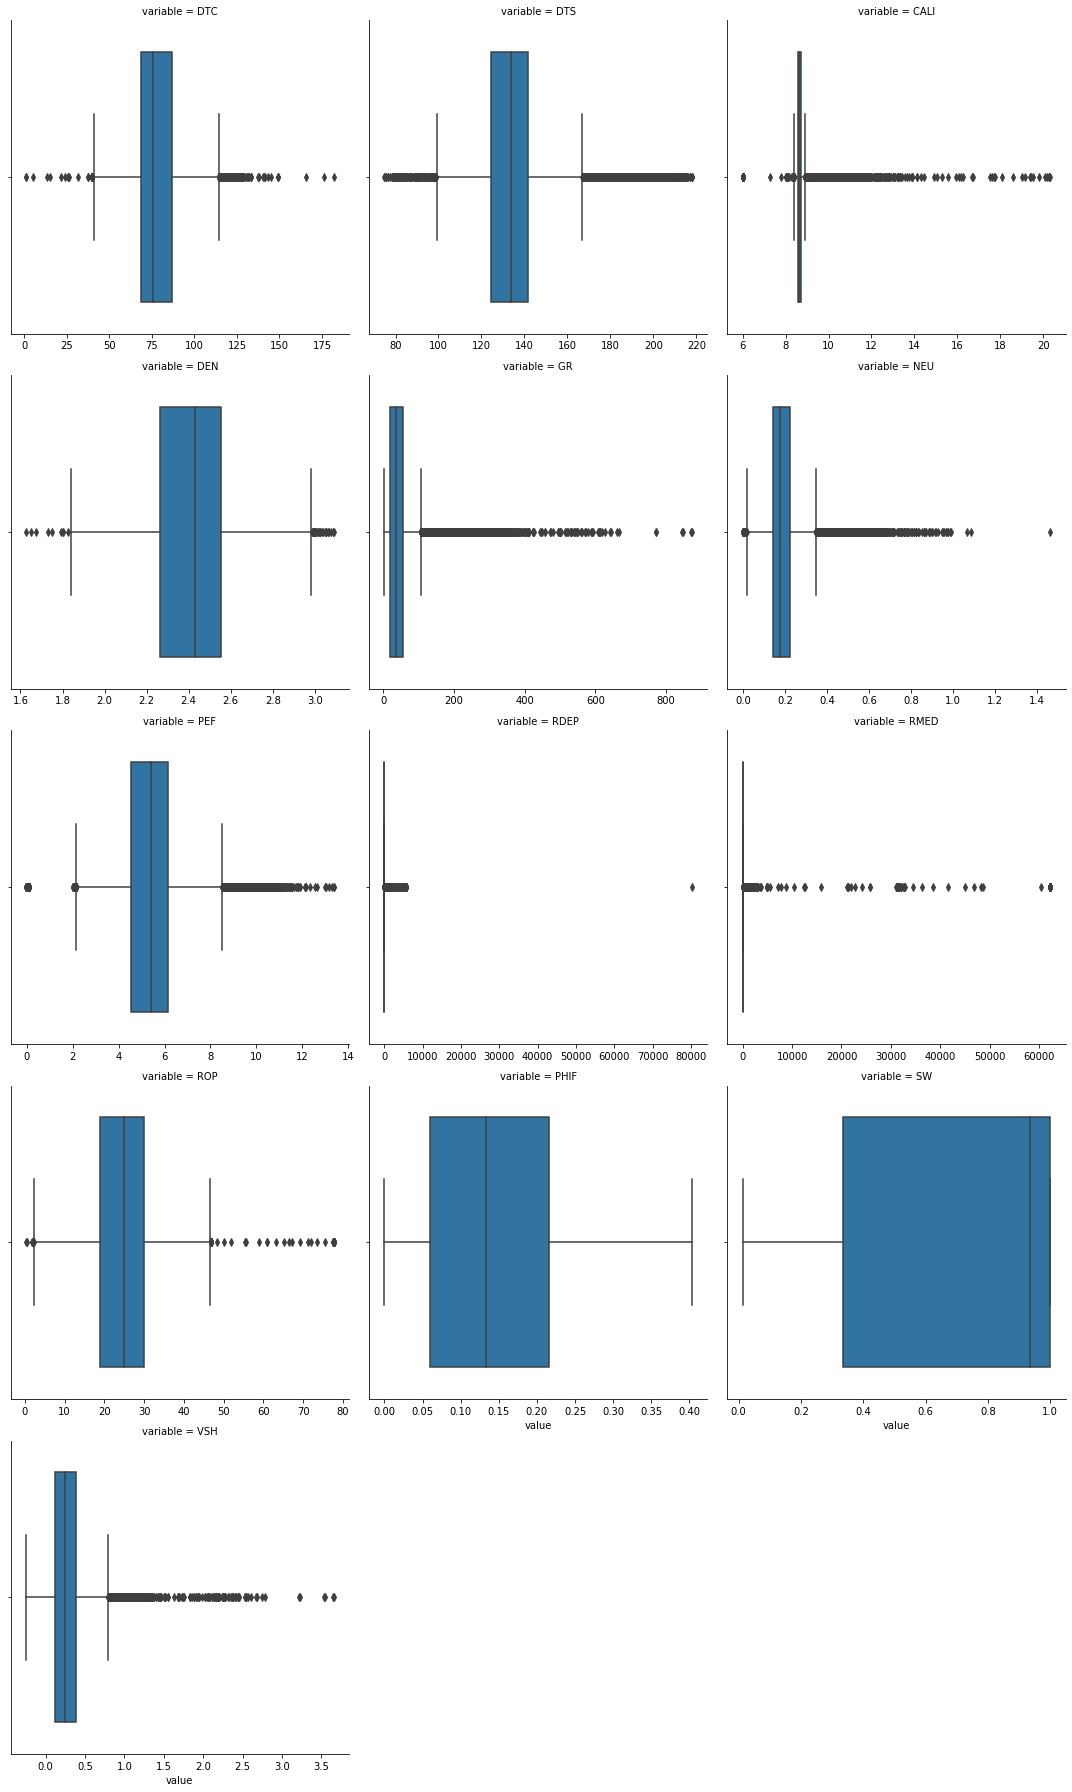

In [32]:
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

In [33]:
Train_clean.head()

,DTC,DTS,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,132.24,nan,12.99,2.29,62.74,0.42,nan,1.18,0.78,nan,0.18,1.00,nan
1,123.92,nan,12.63,2.30,53.84,0.74,nan,0.88,1.08,nan,0.18,1.00,nan
2,115.06,nan,12.77,2.28,52.85,0.46,nan,0.95,0.92,nan,0.17,1.00,nan
3,121.88,nan,11.77,2.28,58.23,0.50,nan,0.87,1.24,nan,0.16,1.00,nan
4,125.35,nan,11.62,2.33,57.34,0.60,nan,0.83,0.96,nan,0.15,1.00,nan


50105

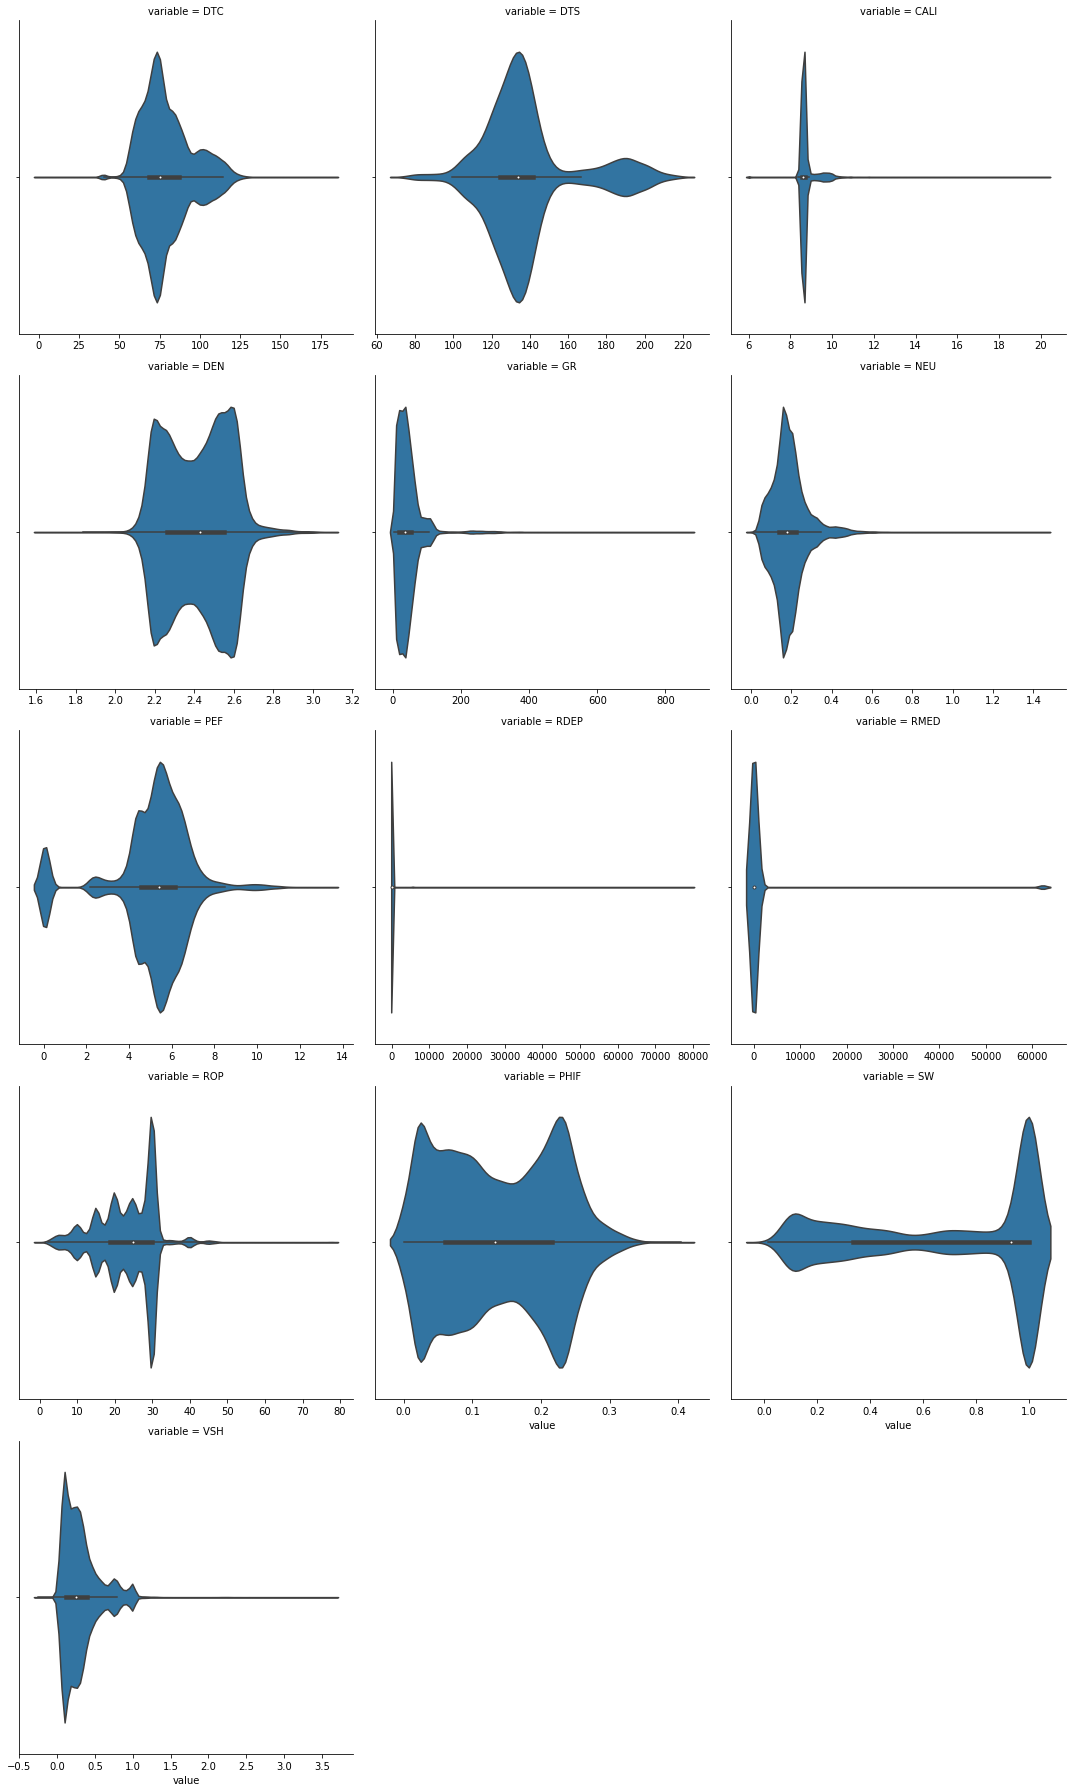

In [43]:
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'violin', sharex = False, col_wrap = 3)

In [88]:
## Model first and check how accurate
## also use logarithm on the numerical variables

In [ ]:
condition = ((Train_clean.DTC > 30) & (Train_clean.DTC < 150) & (Train_clean.CALI > 8) & (Train_clean.CALI < 17) &
            (Train_clean.DEN > 1.8) & (Train_clean.GR < 700) & (Train_clean.NEU < 1.0) & (Train_clean.PEF > 1) &
            (Train_clean.RDEP < 10000) & (Train_clean.RMED < 50000) & (Train_clean.VSH < 3.0))

In [44]:
trim_train = Train_clean[condition]

In [45]:
len(trim_train)

16133

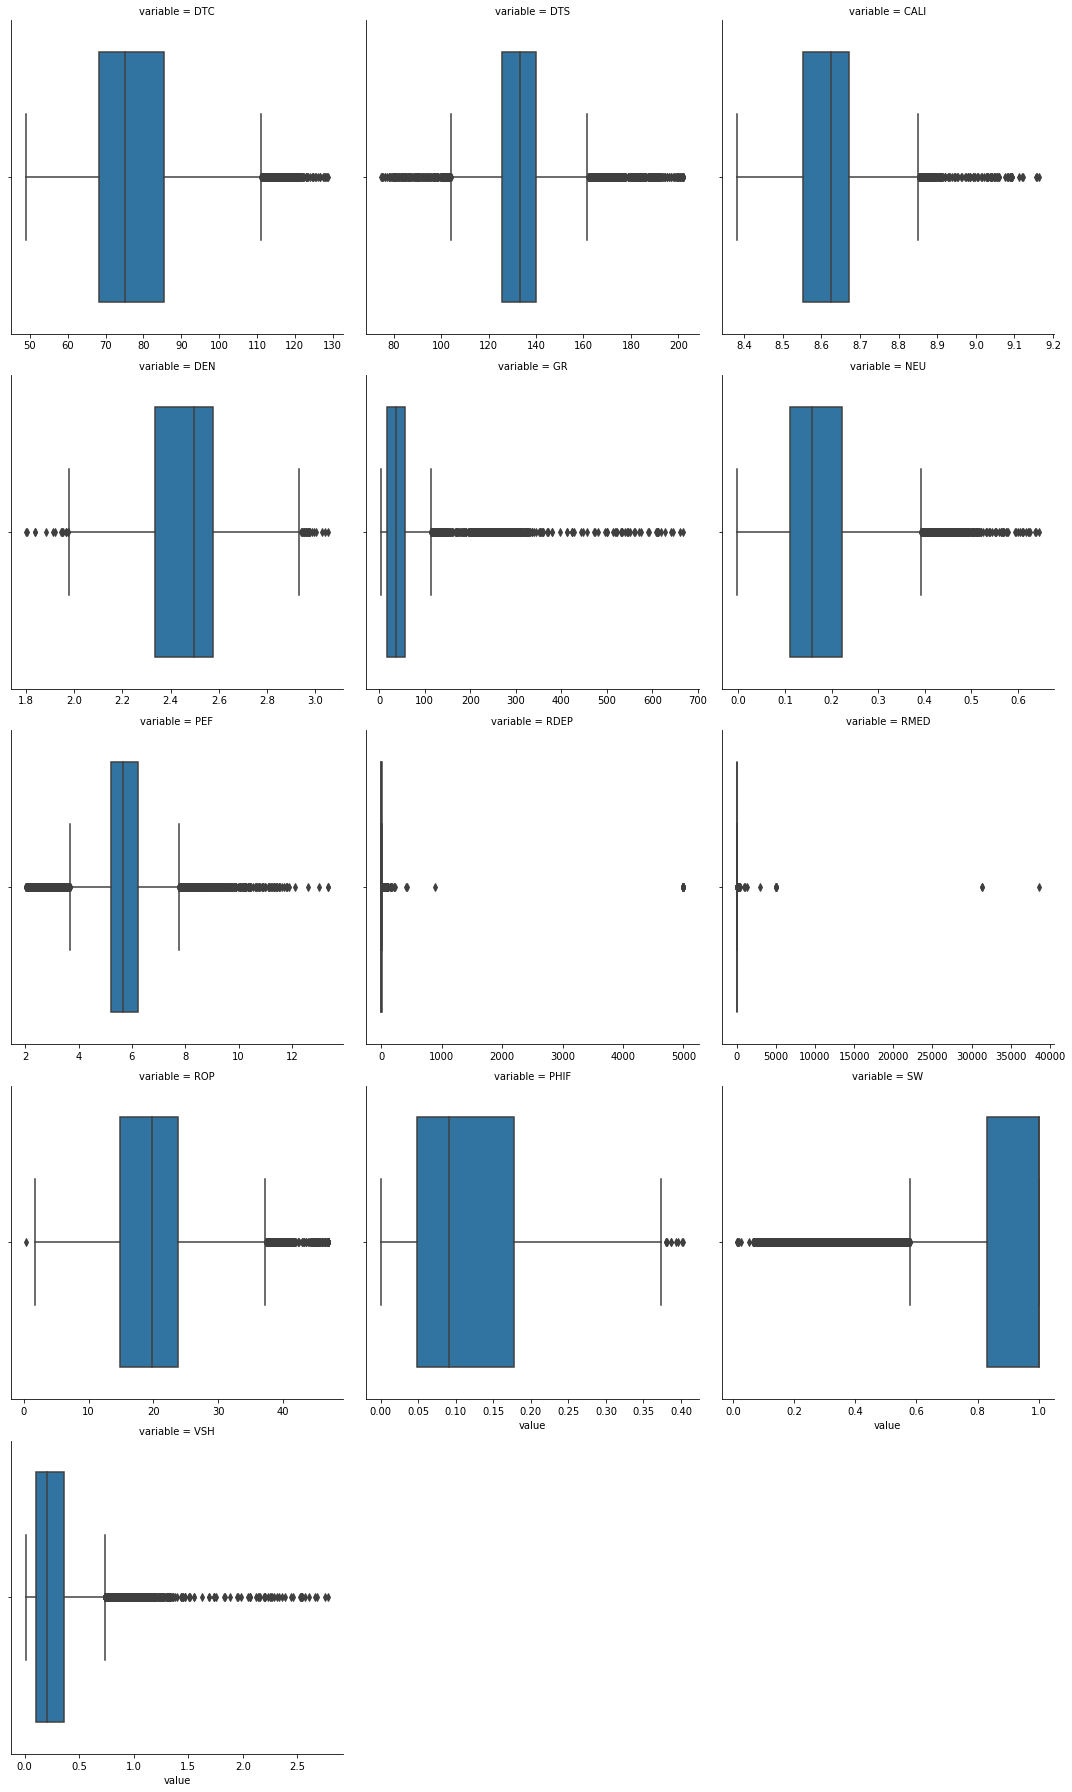

In [47]:
data = trim_train.melt(var_name='variable', value_name='value')
g = sns.catplot(data = data, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

In [49]:
lower = trim_train.ROP.quantile(0.25) - 1.5 * (trim_train.ROP.quantile(0.75) - trim_train.ROP.quantile(0.25))
lower

1.4583000000000013

In [54]:
condition2 = ((trim_train.ROP > lower) & (trim_train.RDEP < 120) & (trim_train.RMED < 210))

In [55]:
trimed_train = trim_train[condition2]

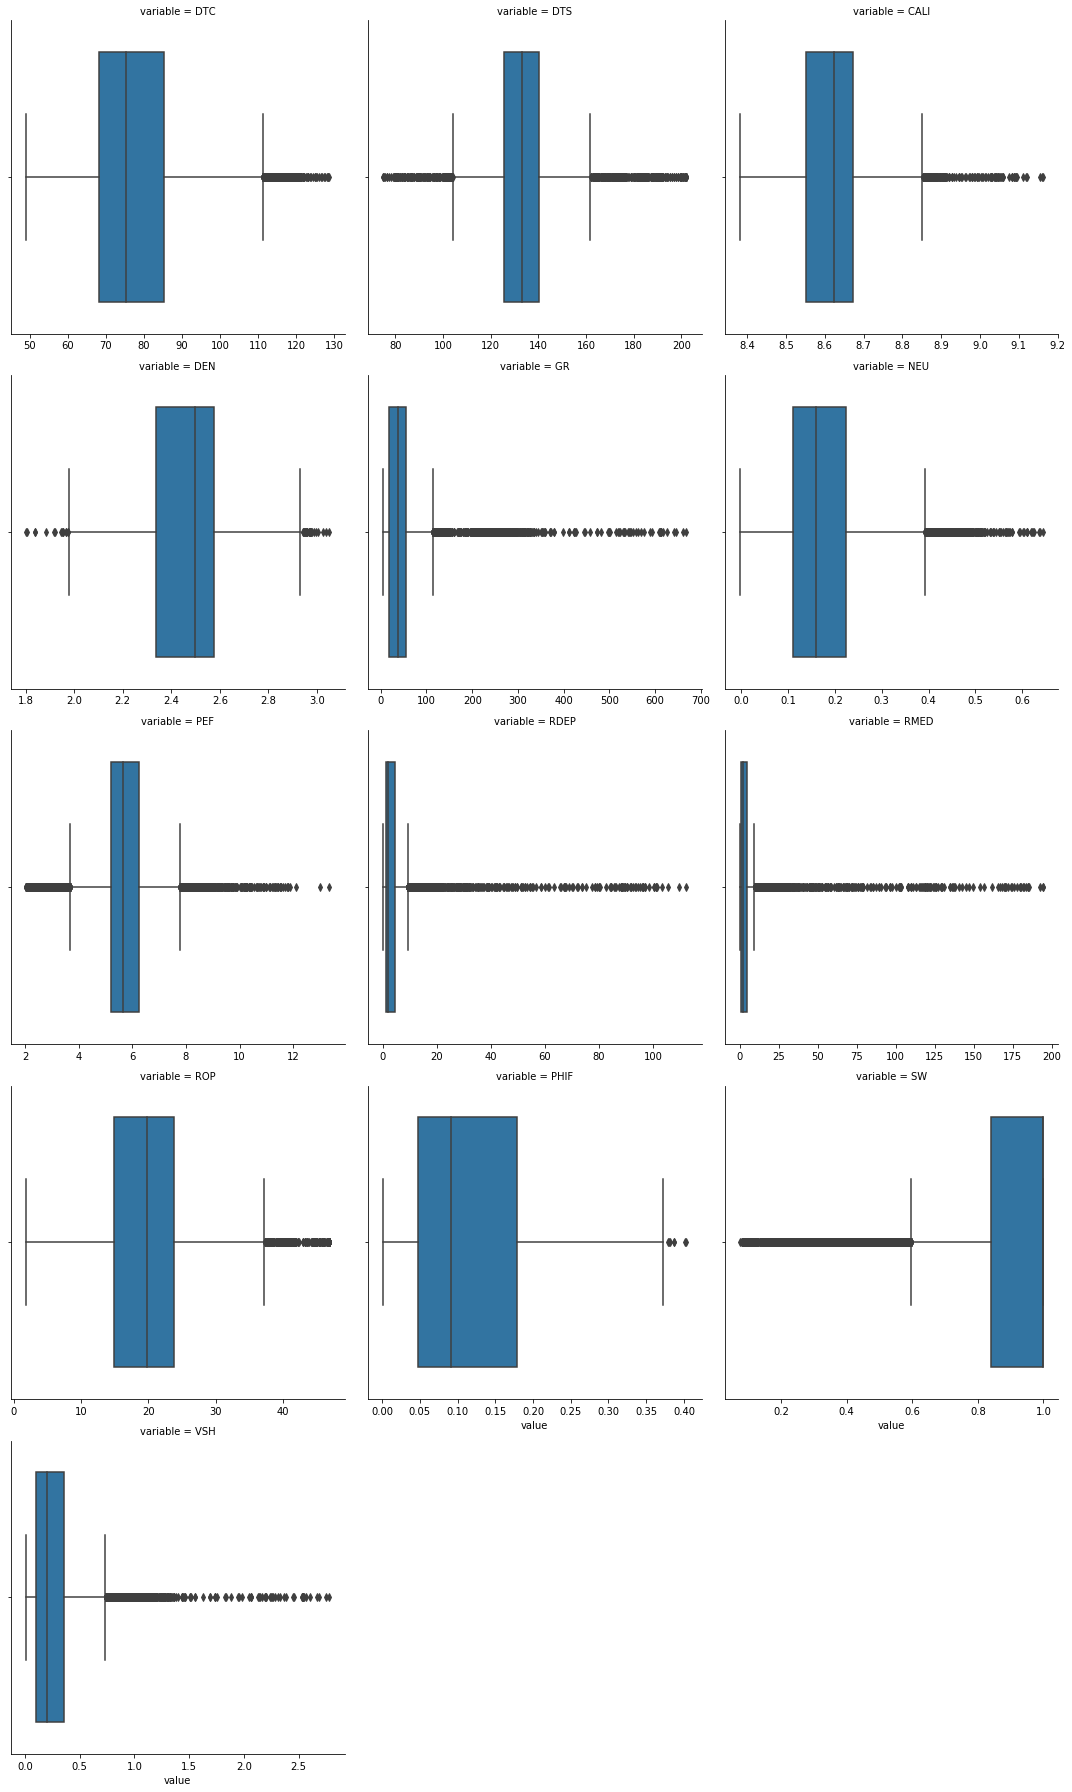

In [56]:
data = trimed_train.melt(var_name='variable', value_name='value')
g = sns.catplot(data = data, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

In [57]:
len(trimed_train)

16084